# **Steerable Pyramids**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from test_image import *
from steerable_pyramid import SteerablePyramid

%matplotlib inline

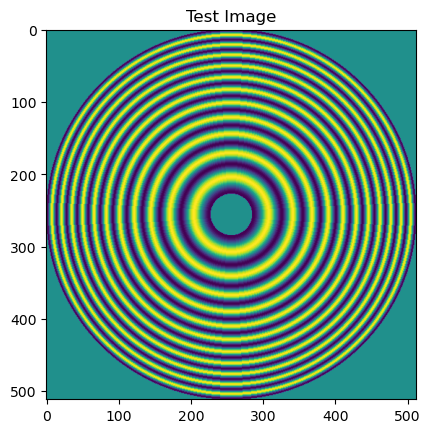

In [2]:
from skimage.data import camera

image = get_test_image(512, f1)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# image = camera()

plt.imshow(image)
plt.title("Test Image");

## Get Steerable Pyramid Class

In [3]:
pyr = SteerablePyramid(depth=4, nbands=4, twidth=1, complex_pyr=False)

In [4]:
# get Steerable Pyramid Filters
filters, crops = pyr.get_filters(image)

# get Steerable Pyramid Decomposition
pyramid = pyr.build_pyramid(image, filters, crops)

# reconstruct original image from pyramid decomposition
recon_dft = pyr.reconstruct_image_dft_dft(pyramid, filters, crops)

### Display Results

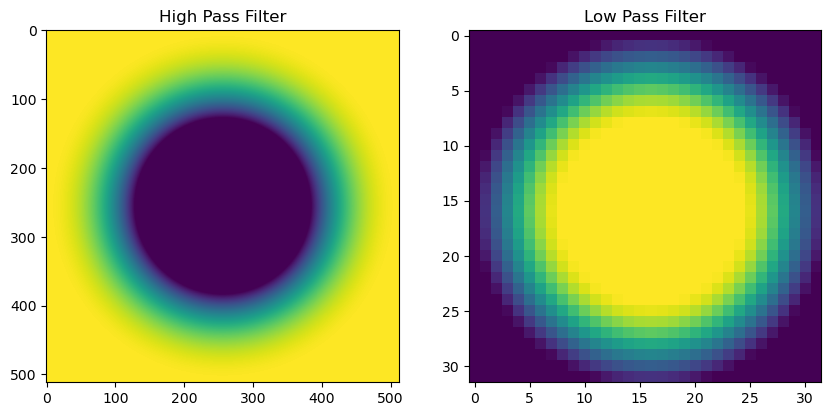

In [5]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(filters[0]);
ax[0].set_title("High Pass Filter");

ax[1].imshow(filters[-1]);
ax[1].set_title("Low Pass Filter");

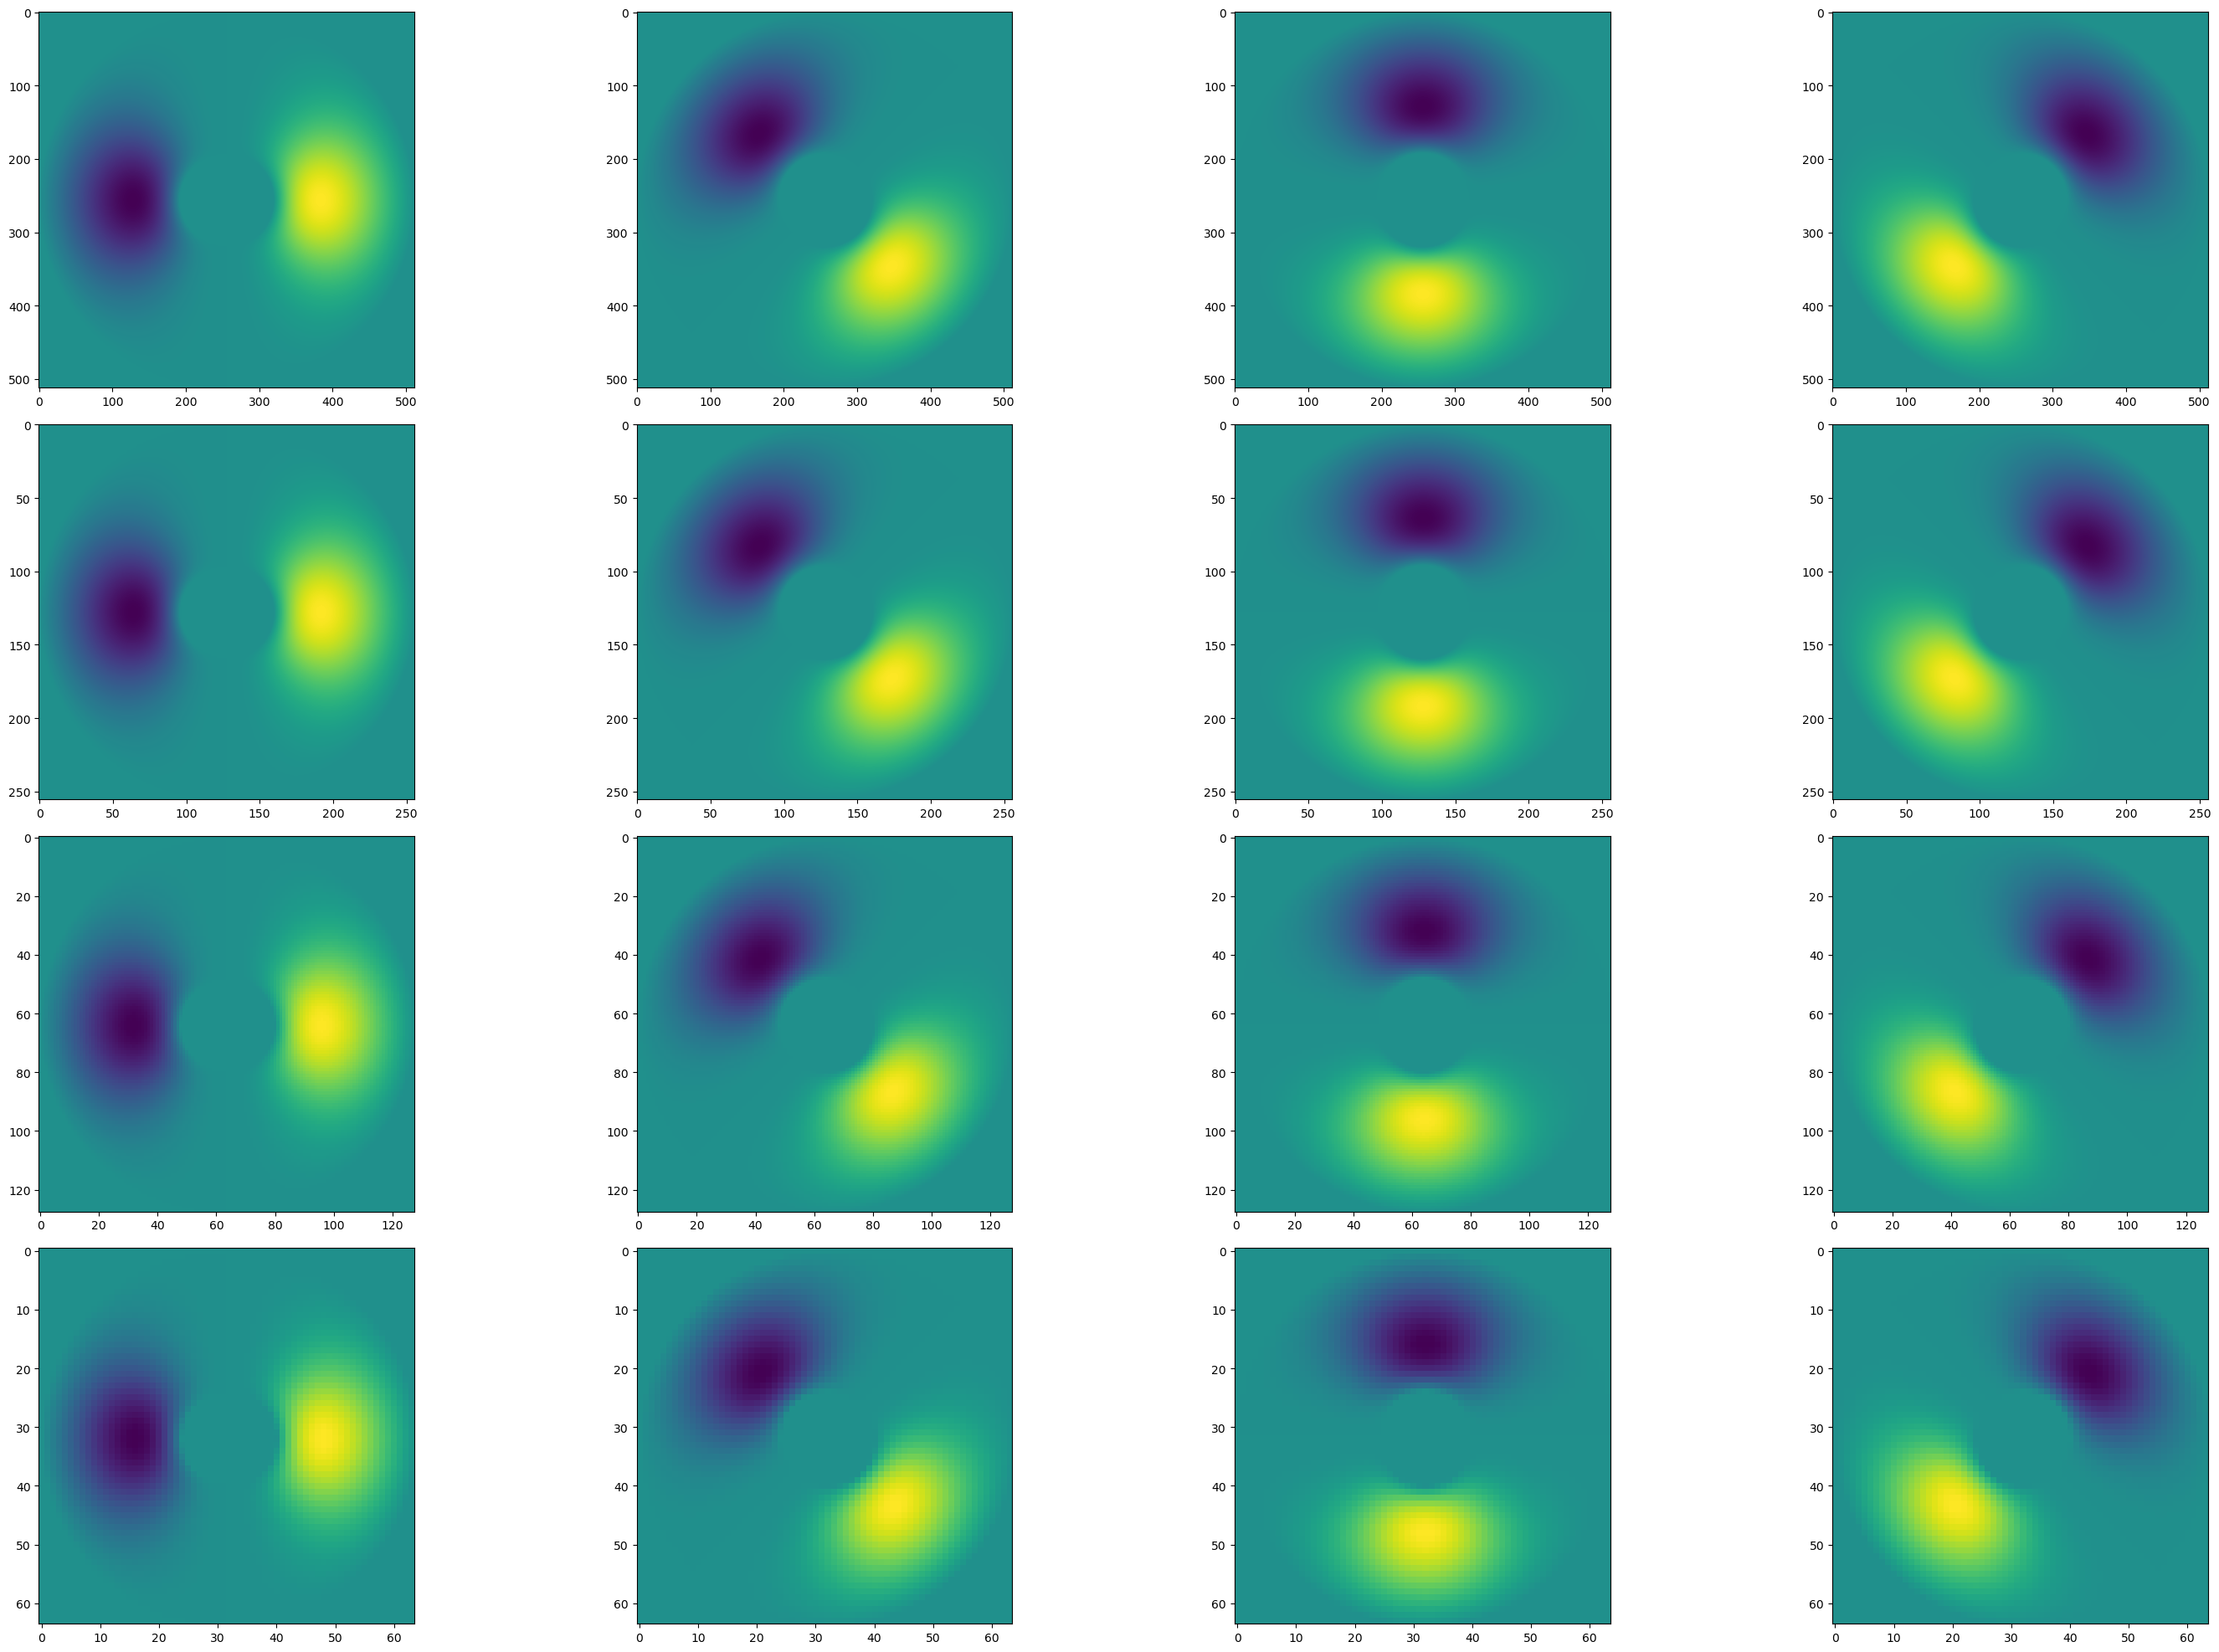

In [6]:
pyr.display(filters);

Get Magnitude and Phase Pyramids for Display

In [7]:
magnitude_pyramid = [np.abs(pyr) for pyr in pyramid]
phase_pyramid = [np.angle(pyr) for pyr in pyramid]

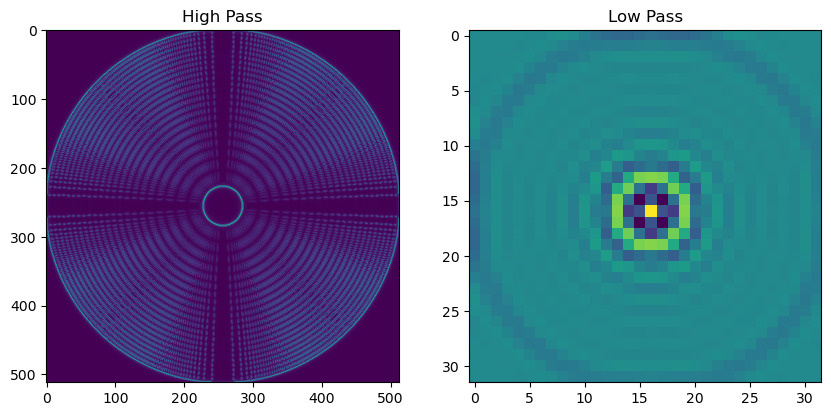

In [24]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.abs(pyramid[0]));
ax[0].set_title("High Pass");

ax[1].imshow(np.abs(pyramid[-1]));
ax[1].set_title("Low Pass");

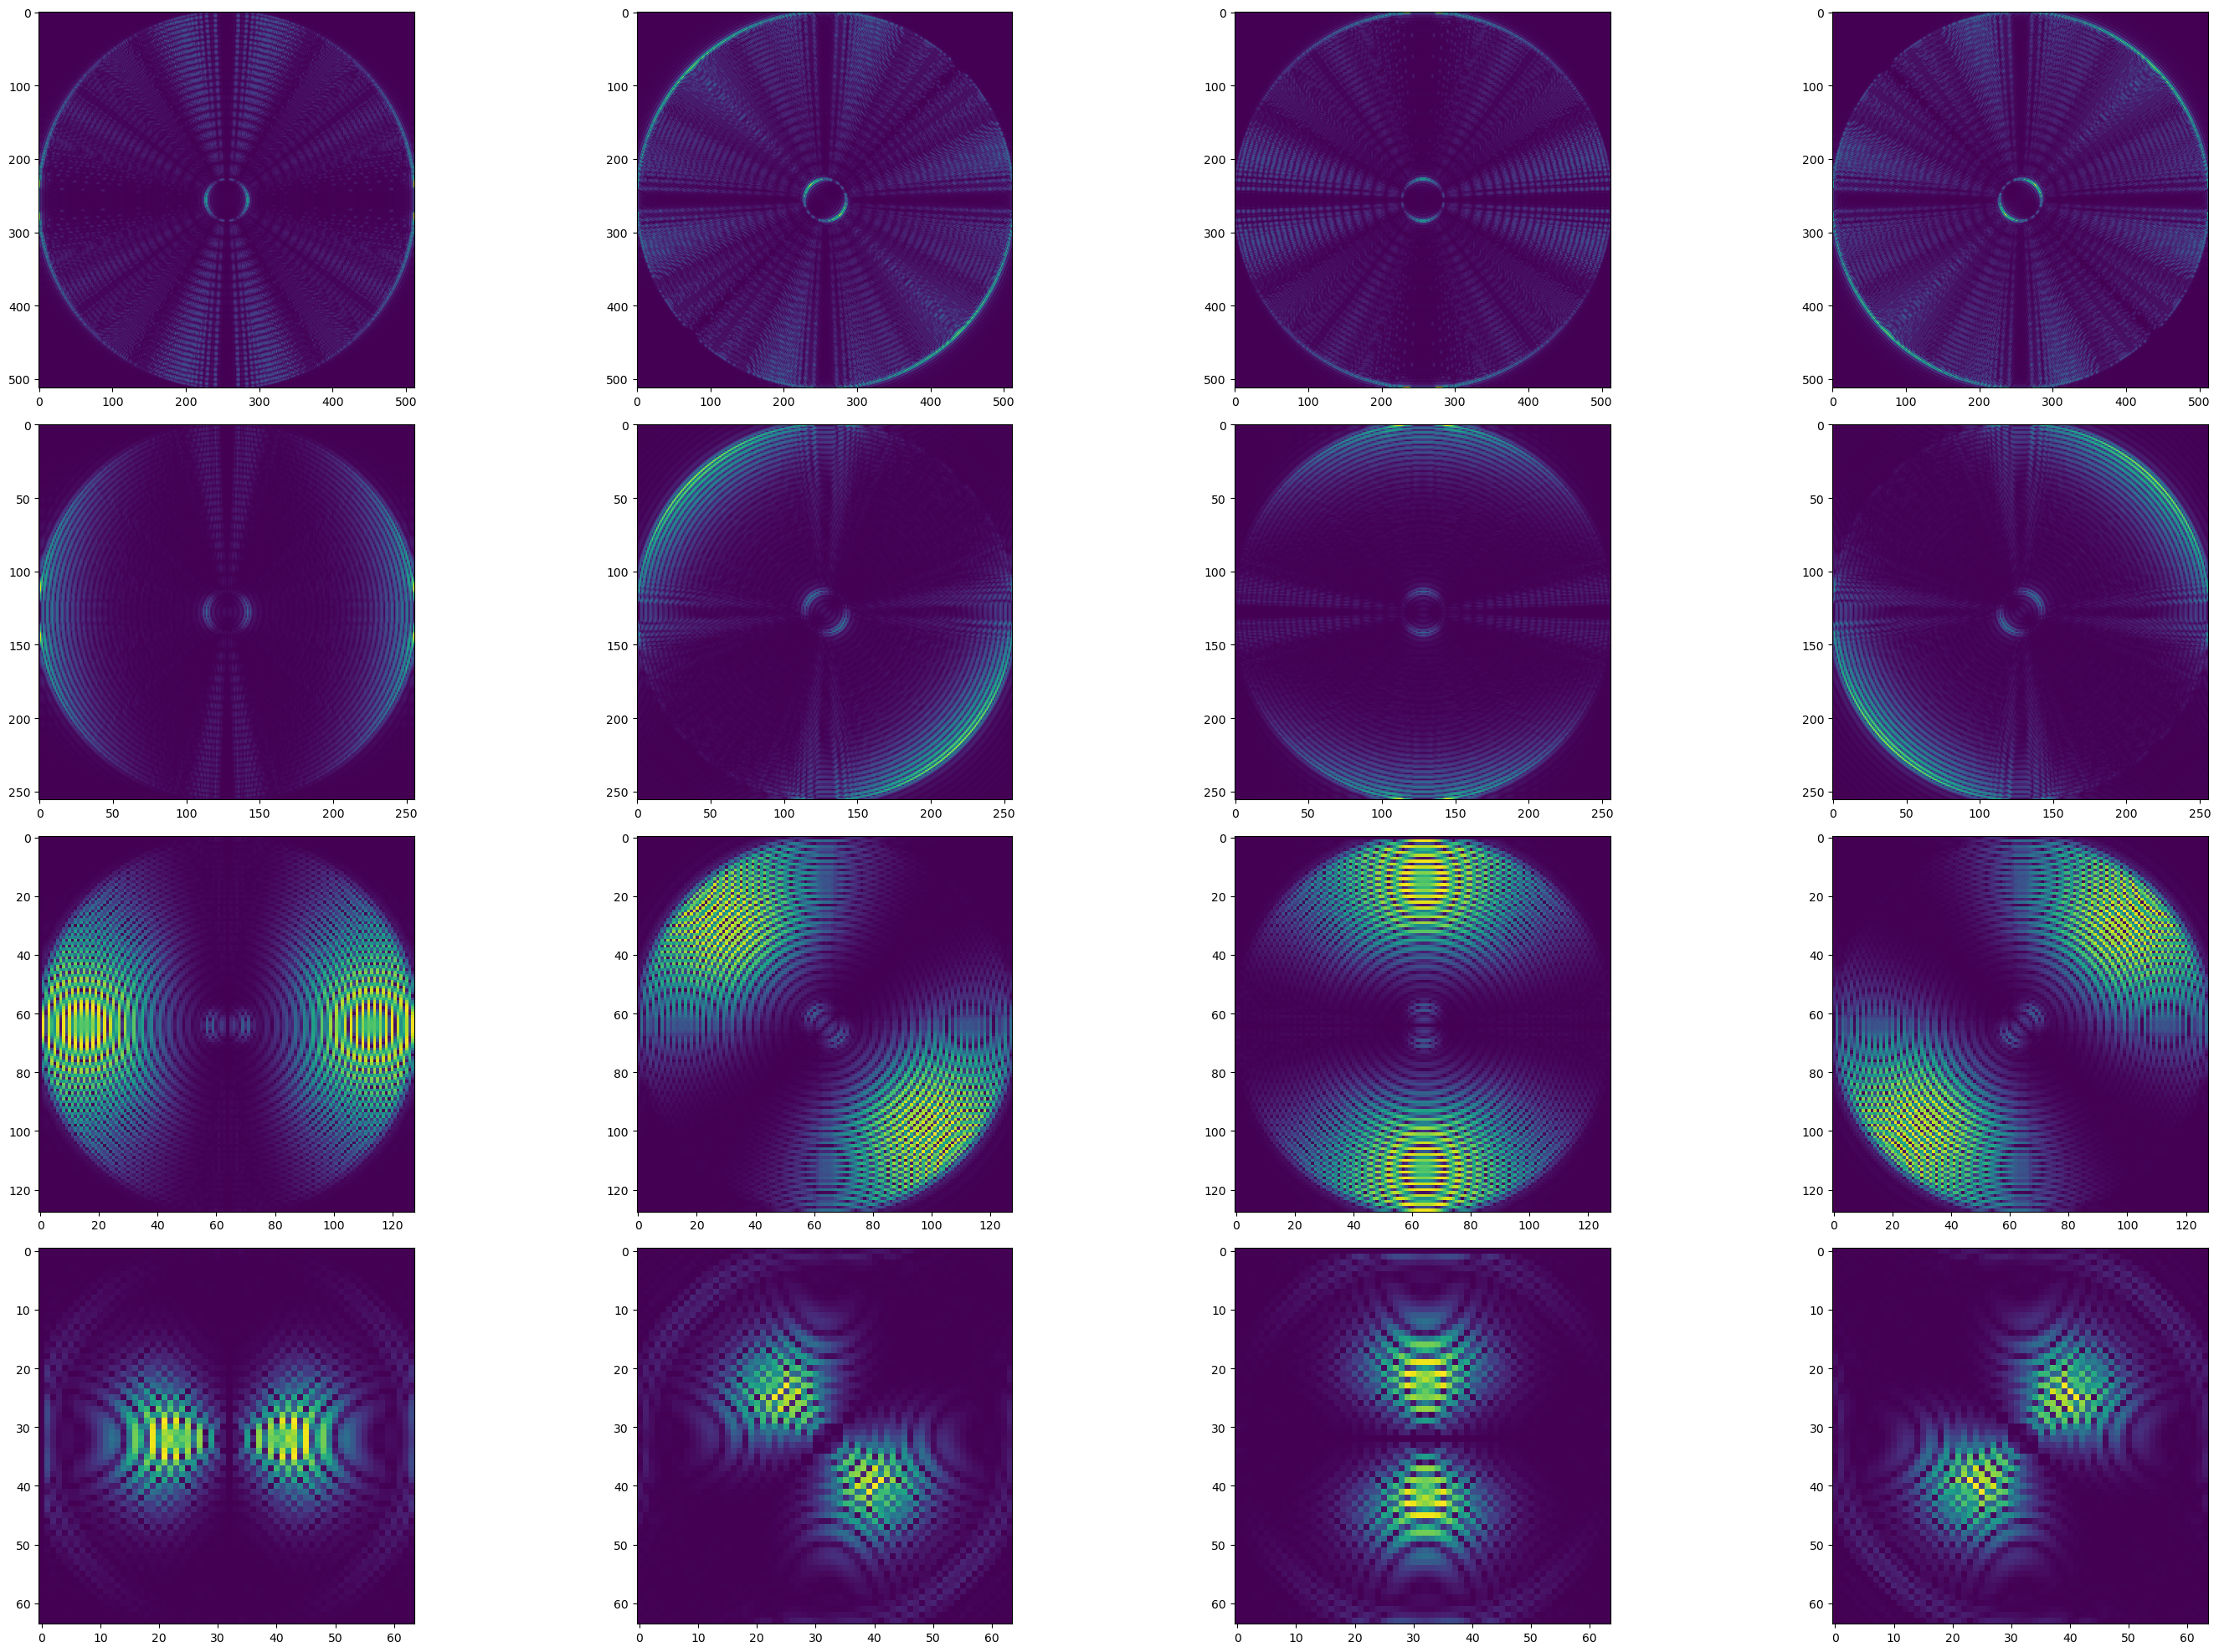

In [8]:
pyr.display(magnitude_pyramid);

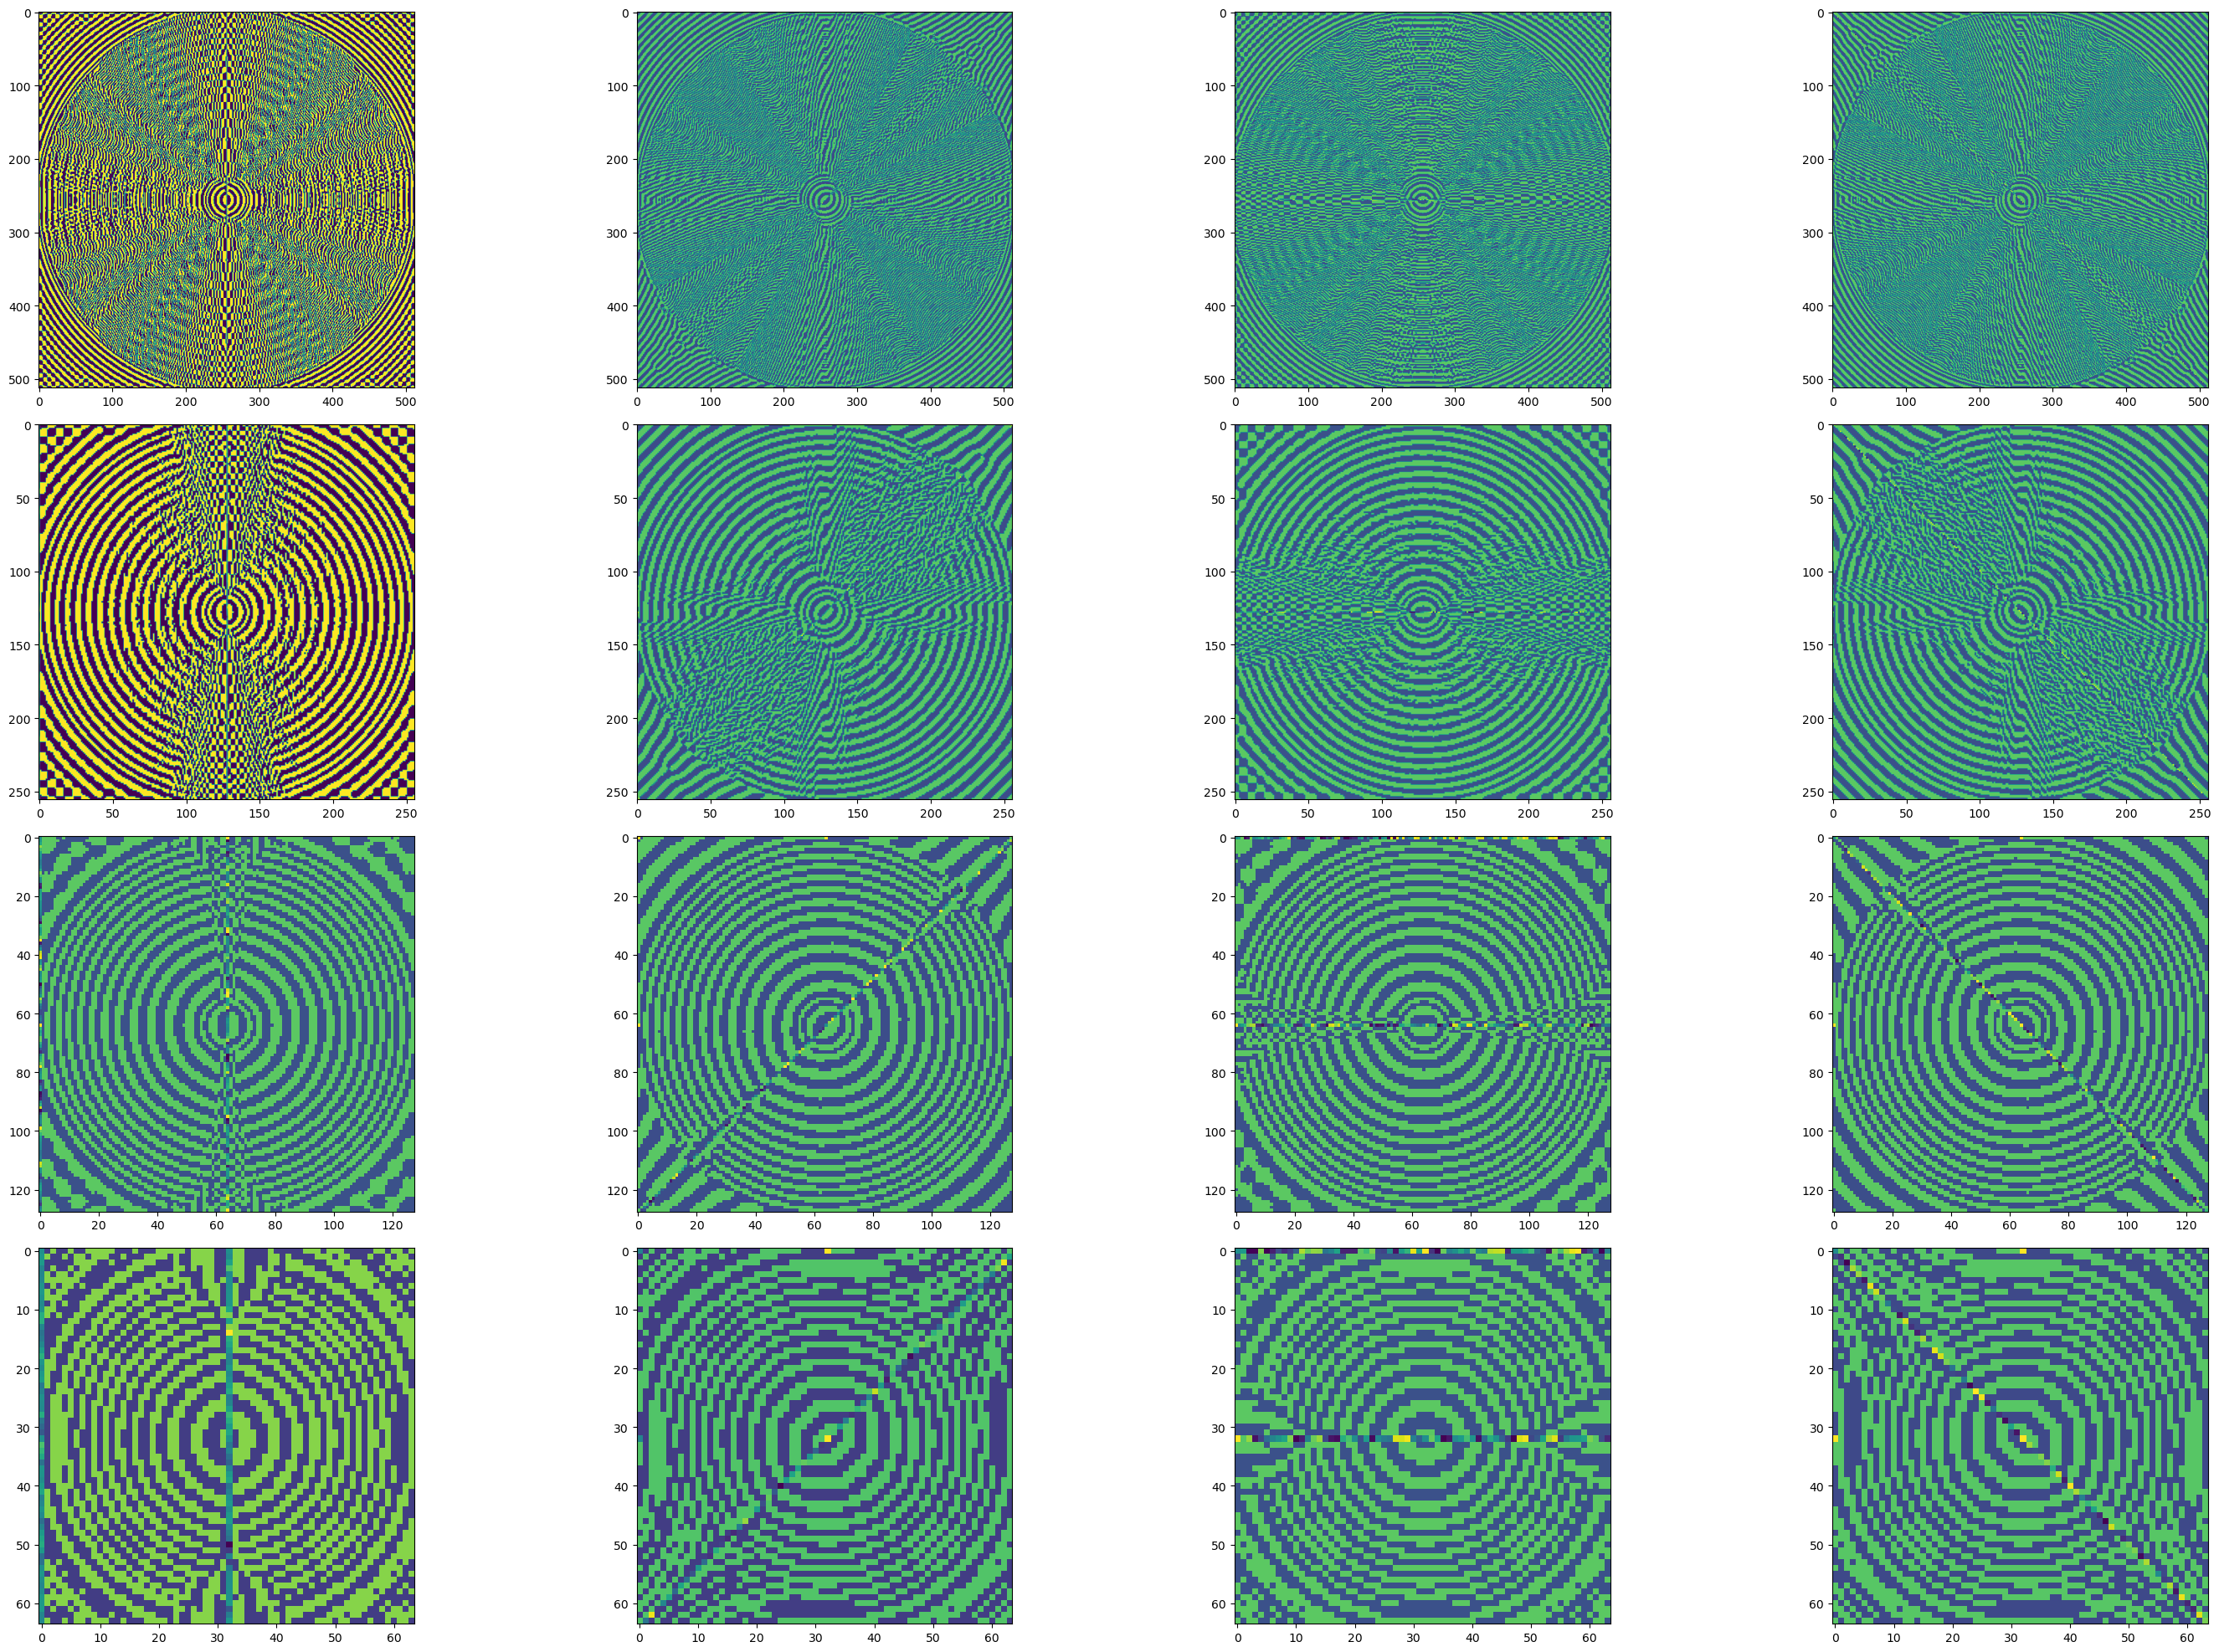

In [9]:
pyr.display(phase_pyramid);

In [10]:
image_dft = np.fft.fftshift(np.fft.fft2(image))

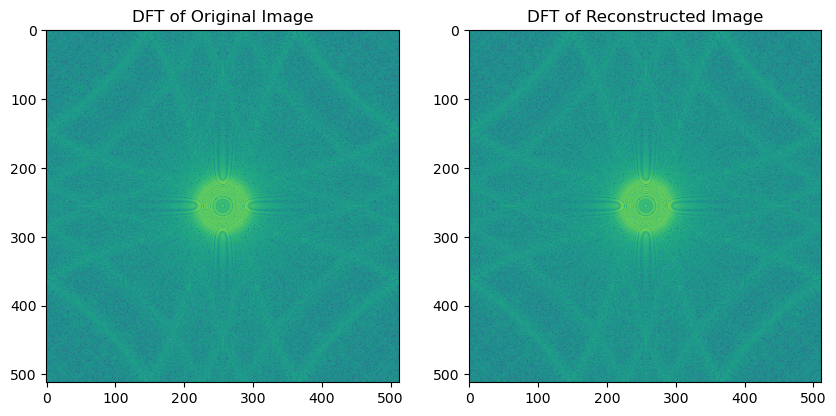

In [11]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.log(np.abs(image_dft)));
ax[0].set_title("DFT of Original Image");

ax[1].imshow(np.log(np.abs(recon_dft)));
ax[1].set_title("DFT of Reconstructed Image");

Get reconstructed image

In [12]:
recon = np.fft.ifft2(np.fft.ifftshift(recon_dft)).real

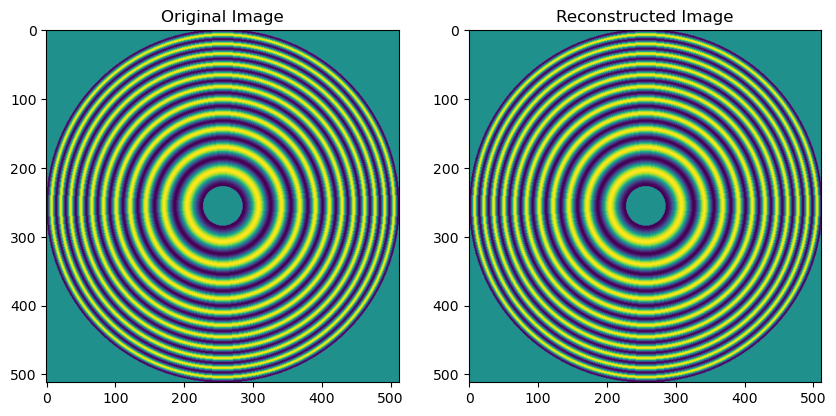

In [14]:
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image);
ax[0].set_title("Original Image");

ax[1].imshow(recon);
ax[1].set_title("Reconstructed Image");

Check the differences

In [15]:
np.sum(np.abs(recon - image)), np.mean(np.square(recon - image))

(6.212063769519763e-09, 1.053688416546883e-27)

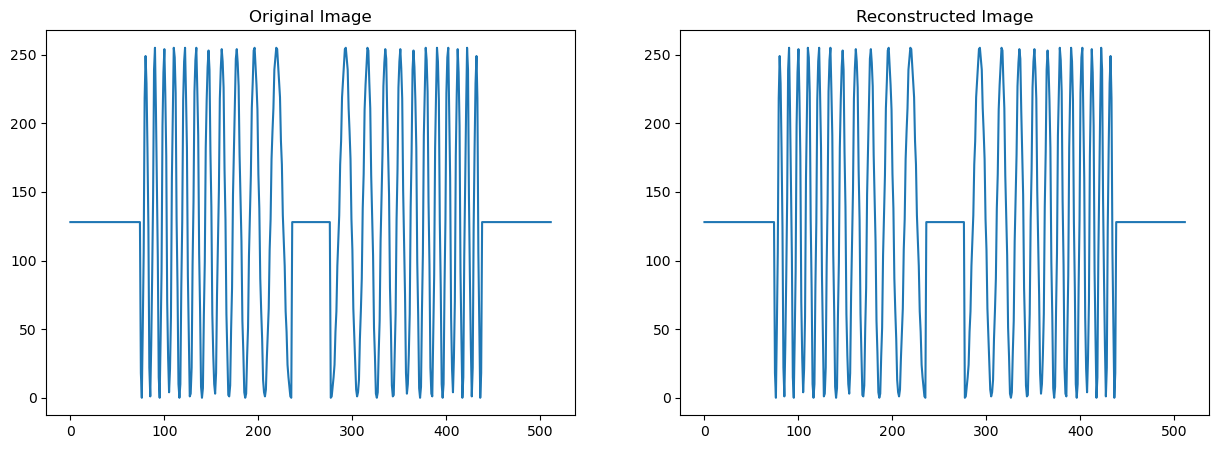

In [16]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.diag(image));
ax[0].set_title("Original Image");

ax[1].plot(np.diag(recon))
ax[1].set_title("Reconstructed Image");